# Summary For CareerVilage 

# Hypothesis
1. With the "answers of professional data", we can predict the "industry and headline" of professional
2. This problem is a Multi-Labeled Classification"

# Work Flow
1. Preprocess Professionals' data into categories. 


2. Extract only nouns from Answers' text.


3. **Making Model 1 : Answers' Keyword** <br/>
1) Mapping Answer's author_id and professinals_id <br/>
2) target columns: the categories of Professionals' (1) <br/>
3) input data: Answers' text. (2) <br/>


4. Estimate the NA values of professinals' industry and headline with a predictive model. <br/>
1) (NA Values Handling → Softmax (Classifier)


5. Extract keywords by combining Quests + tags & Extract only nouns from Questions' text.


6. **Making Model 2 : Classify Professionals' Keyword** <br/>
1) target columns: the industry and headline of Professionals' (4) <br/>
2) input data: Questions' text (5) <br/>


# Expected Result
- Data → Model 1 → Model 2 → Output(Result)

# Proposal

1. Add entries so that people can select the Professionals' Industry and Headline within the pre-treated category.


2. Floating tags to top10 so that people can be automatically viewed when you click them on a webpage


3. Checking the relationship between Professional and Student Offline Matching (Direction of Development)<br/>
1) In the future, allowing students in the same position as professional to match offline will help them more in their careers and career choices.

### Contents
1. [Data Load](#dataload)
2. [EDA](#eda)
3. [Analyze](#analyze)
4. [Analyze2](#analyze2)

### 1.  <a id="dataload"> Data Load </a>

In [1]:
import pandas as pd
import numpy as np
import os
from os import chdir
import sys
import re 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
answers = pd.read_csv('../input/answers.csv')
comments = pd.read_csv('../input/comments.csv')
emails = pd.read_csv("../input/emails.csv")
group_memberships = pd.read_csv('../input/group_memberships.csv')
groups = pd.read_csv('../input/groups.csv')
matches = pd.read_csv('../input/matches.csv')
professionals = pd.read_csv("../input/professionals.csv")
questions = pd.read_csv('../input/questions.csv')
school_memberships = pd.read_csv('../input/school_memberships.csv')
students = pd.read_csv('../input/students.csv')
tag_questions = pd.read_csv("../input/tag_questions.csv")
tag_users = pd.read_csv('../input/tag_users.csv')
tags = pd.read_csv('../input/tags.csv')

## 2. <a id="eda"> EDA </a>

### 2-1. Answers

In [5]:
answers.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


In [6]:
answers.answers_body[1] 

"<p>Hi. I joined the Army after I attended college and received a Bachelor's Degree in Criminal Justice.  Commissioned officers enter the Military with a four year degree or receive officer training after joining and complete a tour. You can prepare yourself by taking Reserve Officer Training Corps (ROTC) while in high school or a university. You can also attend Officer Candidate School (OCS) after graduating from college or become commissioned by earning a professional degree. If you decide to earn a degree, think about what you would like to do while in the military.  The experience in the military was very rewarding. I wish you well and much success in your future. </p>"

In [7]:
answers.describe()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
count,51123,51123,51123,51123,51122
unique,51123,10169,23110,51062,50401
top,3f0e8d3f4ca44e1c805e7cd88b429555,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,2016-10-13 00:52:24 UTC+0000,"<p>&lt;span style=""background-color: transpare..."
freq,1,1710,58,2,103


- 51122 answers

- The unique value of answerers_author_id has been reduced by one-fifth, and experts have responded several times.

- We should hash out the author's keywords in the text of the people who answered.

##### If the hashtag enters a new question, it will be necessary to connect it to an expert who answered a lot of the hashtags.


### 2-2. Comments

In [8]:
comments.head()

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40 UTC+0000,"First, you speak to recruiters. They are train..."
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47 UTC+0000,Most large universities offer study abroad pro...
2,c354f6e33956499aa8b03798a60e9386,6ed20605002a42b0b8e3d6ac97c50c7f,ca7a9d7a95df471c816db82ee758f57d,2019-01-31 18:44:04 UTC+0000,"First, I want to put you at ease that the oppo..."
3,73a6223948714c5da6231937157e4cb7,d02f6d9faac24997a7003a59e5f34bd3,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 17:53:28 UTC+0000,Your question submission was great! I just wan...
4,55a89a9061d44dd19569c45f90a22779,e78f75c543e84e1c94da1801d8560f65,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 14:51:53 UTC+0000,Thank you. I'm new to this site. I'm sorry if ...


In [9]:
comments.comments_body[1]

"Most large universities offer study abroad programs.  The study abroad programs are found on the schools website.  You may have to click into the Undergraduate or Graduate links.   I also recommend reaching out to the university counselors.  The have wealth of information and details that may not be on the website. \r\n\r\nMy son will be studying in France and Sweden next year through DePaul University.   The University of Southern California has a very strong international program in which most students participate.  It's a great opportunity to learn the culture of other countries while in school."

In [10]:
comments.describe()

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
count,14966,14966,14966,14966,14962
unique,14966,4231,9923,14905,11963
top,ba2378826687451a9040a9bc1732569a,36ff3b3666df400f956f8335cf53e09e,4c6ae4bd2136472899c15b798eb9d3df,2016-07-22 22:13:05 UTC+0000,Thank you!
freq,1,317,30,3,388


### 2-3. Emails

In [11]:
emails.head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily
4,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40 UTC+0000,email_notification_daily


In [12]:
emails.describe() 

,emails_id
count,1.850101e+06
mean,1.362206e+06
std,6.449917e+05
min,1.060000e+02
25%,8.813900e+05
50%,1.400010e+06
75%,1.911846e+06
max,2.409829e+06


### 2-4. Group_memberships

In [13]:
group_memberships.head()

,group_memberships_group_id,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d
3,eabbdf4029734c848a9da20779637d03,fa9a126e63714641ae0145557a390cab
4,eabbdf4029734c848a9da20779637d03,299da113c5d1420ab525106c242c9429


In [14]:
group_memberships.describe()

,group_memberships_group_id,group_memberships_user_id
count,1038,1038
unique,46,727
top,f16d593910bf443598839021bbe97128,b0f6c44506444fb99e910dcc5836b5d8
freq,117,14


### 2-5. Groups

In [15]:
groups.head()

,groups_id,groups_group_type
0,eabbdf4029734c848a9da20779637d03,youth program
1,7080bf8dcf78463bb03e6863887fd715,youth program
2,bc6fc50a2b444efc8ec47111b290ffb8,youth program
3,37f002e8d5e442ca8e36e972eaa55882,youth program
4,52419ff84d4b47bebd0b0a6c1263c296,youth program


In [16]:
groups.groups_group_type.unique() 

array(['youth program', 'cause', 'professional network', 'club',
       'competition', 'mentorship program', 'interest group'],
      dtype=object)

In [17]:
groups.describe()

,groups_id,groups_group_type
count,49,49
unique,49,7
top,cfaac1762bed4c8bb88696267129a560,youth program
freq,1,33


##### It seems that group_type is determined through a specific program. See if there is a connection between groups

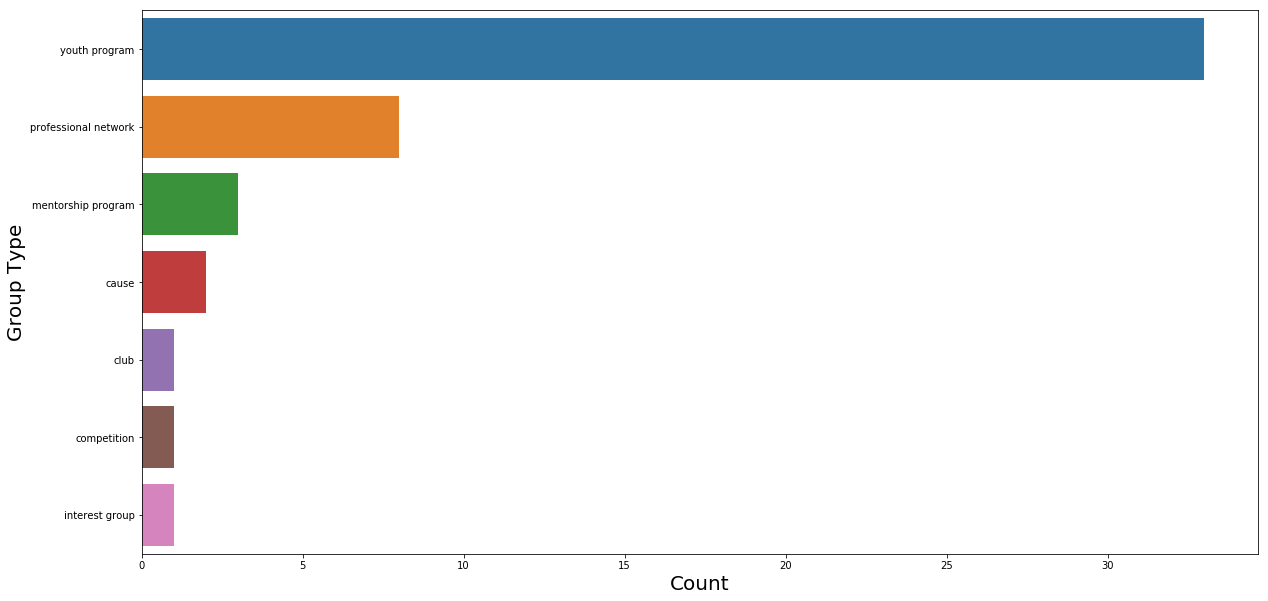

In [18]:
sorted_groups = groups['groups_group_type'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(sorted_groups.values,sorted_groups.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Group Type", fontsize=20)
plt.show()

### 2-6. Matches

In [19]:
matches.head()

,matches_email_id,matches_question_id
0,1721939,332a511f1569444485cf7a7a556a5e54
1,1665388,332a511f1569444485cf7a7a556a5e54
2,1636634,332a511f1569444485cf7a7a556a5e54
3,1635498,332a511f1569444485cf7a7a556a5e54
4,1620298,332a511f1569444485cf7a7a556a5e54


In [20]:
matches.describe()

,matches_email_id
count,4.316275e+06
mean,1.478192e+06
std,5.895280e+05
min,1.060000e+02
25%,1.011924e+06
50%,1.544656e+06
75%,1.970642e+06
max,2.409829e+06


### 2-7. Professionals

In [21]:
professionals.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [22]:
print('location:', professionals.professionals_location.unique())

print('Industry:', professionals.professionals_industry.unique())

location: [nan 'New York, New York' 'Boston, Massachusetts' ...
 'Kingston, Washington' 'Berwyn, Illinois' 'Woodland, California']
Industry: [nan 'Special Events' 'education, tech, media' ... 'Dev Sec Ops'
 'Electrical engineering Computer Software' 'Mobility and Entertainment']


In [23]:
professionals.describe()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
count,28152,25054,25576,26085,28152
unique,28152,2582,2470,22272,28000
top,e46aa9807d3d4b699c81903bc5ef47f5,"New York, New York",Telecommunications,--,2011-12-26 05:00:00 UTC+0000
freq,1,1337,3166,325,45


- Primary classification can be performed with hashtags of questions according to the location/industry of experts
- Location: It's the United States, it's divided into 52 states.
- Industry: Therefore it seems necessary to classify into section categories (manufacturing/communication/services etc.)

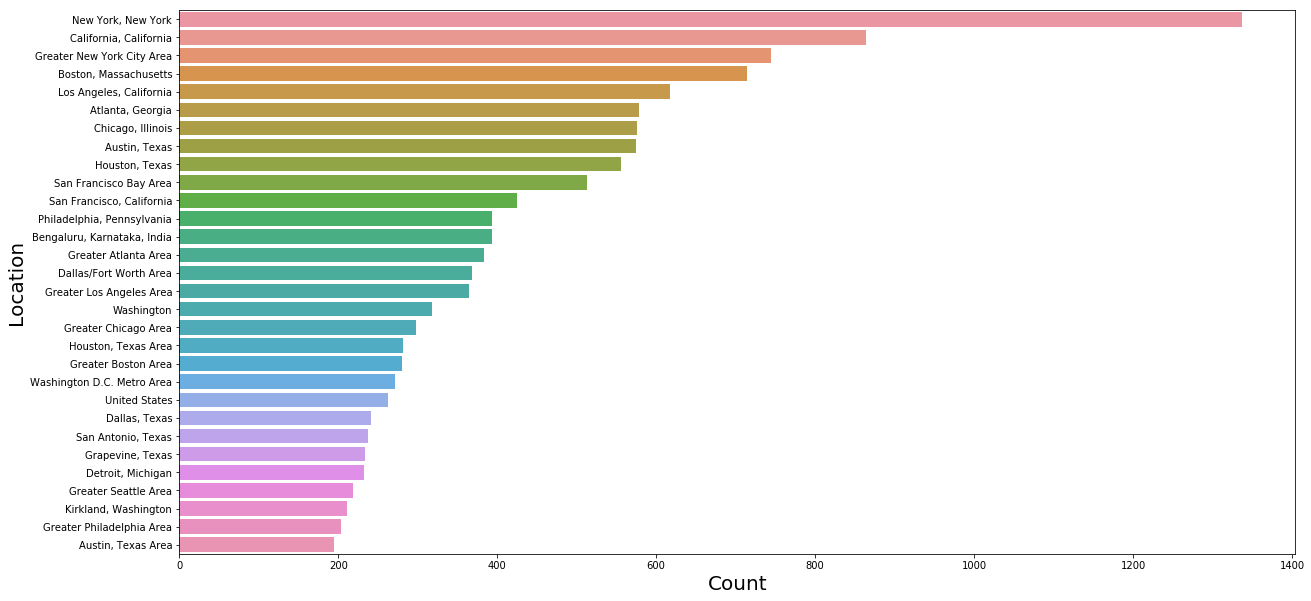

In [24]:
professionals_locations = professionals['professionals_location'].value_counts().head(30)
plt.figure(figsize=(20,10))
sns.barplot(professionals_locations.values, professionals_locations.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Location", fontsize=20)
plt.show()

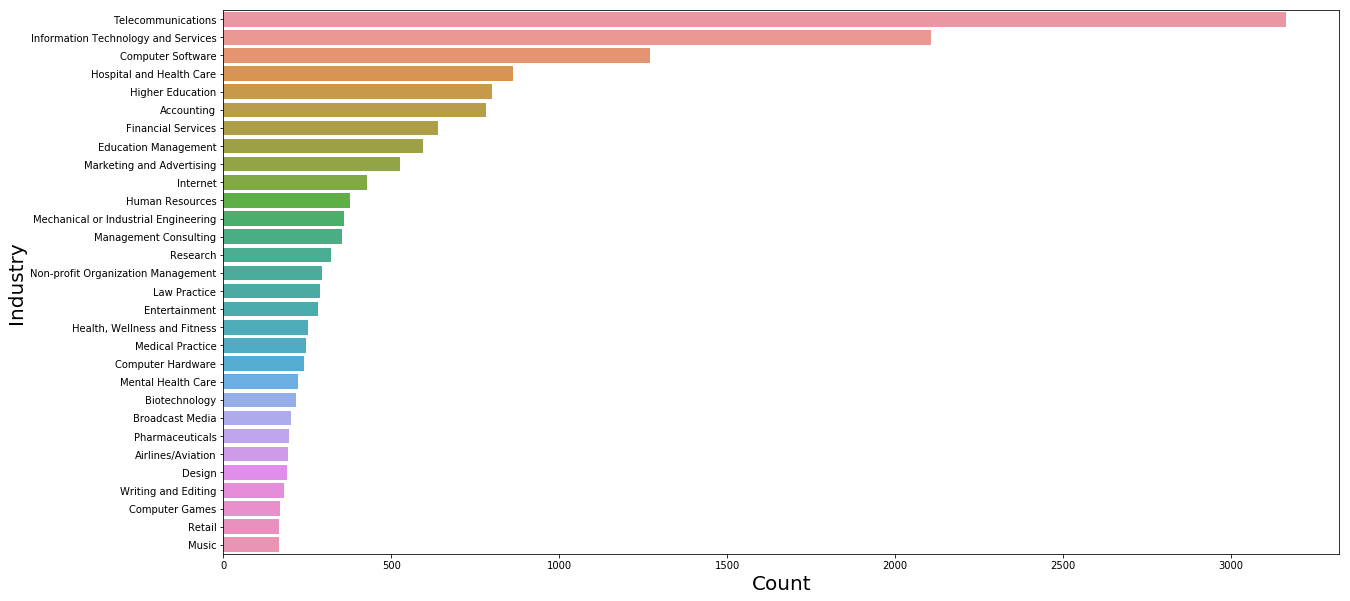

In [25]:
professionals_industries = professionals['professionals_industry'].value_counts().head(30)
plt.figure(figsize=(20,10))
sns.barplot(professionals_industries.values, professionals_industries.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Industry", fontsize=20)
plt.show()

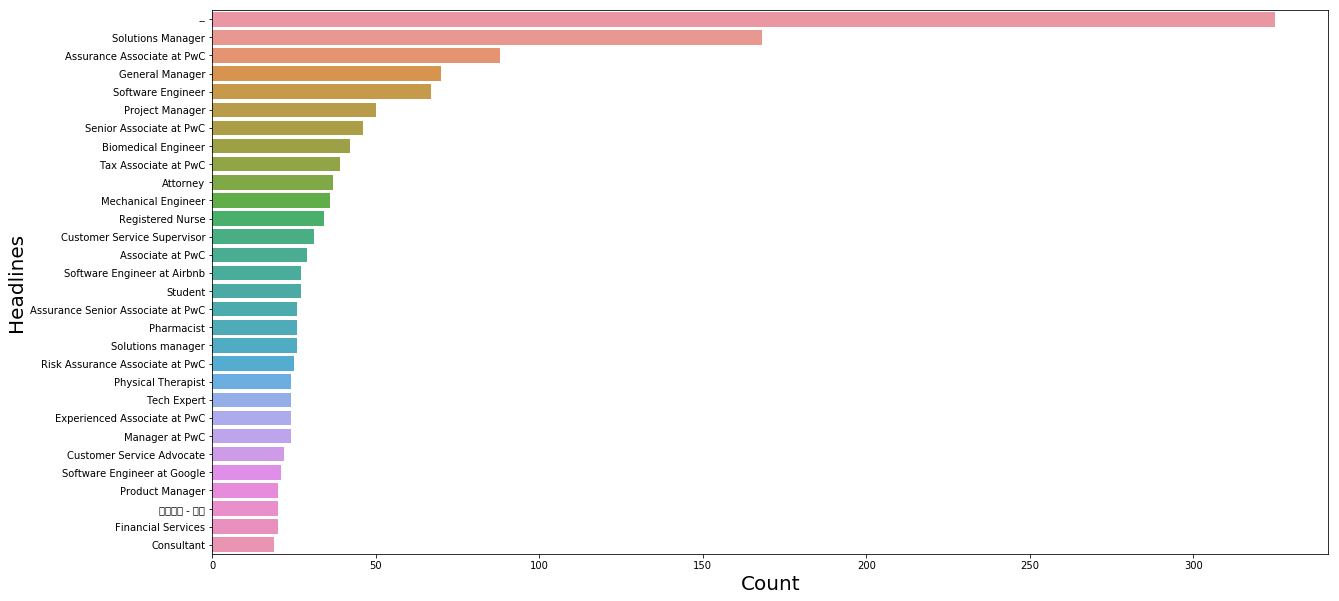

In [26]:
professionals_headlines = professionals['professionals_headline'].value_counts().head(30)
plt.figure(figsize=(20,10))
sns.barplot(professionals_headlines.values, professionals_headlines.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Headlines", fontsize=20)
plt.show()

### 2-8. Questions

In [27]:
questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [28]:
questions.describe()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
count,23931,23931,23931,23931,23931
unique,23931,12329,23869,23739,23681
top,fc20dc2ae1e54796a7d7994b333b27cb,2fe767de78fa4dfd83f0021cf7712064,2016-10-22 20:21:17 UTC+0000,How do I become an IAS officer?,Accounting student at Towson university #acco...
freq,1,93,2,6,16


### 2-9. School_memberships

In [29]:
school_memberships.head()

,school_memberships_school_id,school_memberships_user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d
2,199821,23dce13ca6164a73aec7a3cd56a4884d
3,186239,9c5803ae43ca4cf6b27ea85871625116
4,182063,9c5803ae43ca4cf6b27ea85871625116


In [30]:
school_memberships.describe()

,school_memberships_school_id
count,5638.000000
mean,167256.254346
std,47588.724813
min,69421.000000
25%,125573.500000
50%,196934.000000
75%,198771.000000
max,214607.000000


### 2-10. Students

In [31]:
students.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24 UTC+0000
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44 UTC+0000
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00 UTC+0000
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00 UTC+0000
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00 UTC+0000


In [32]:
students.describe()

,students_id,students_location,students_date_joined
count,30971,28938,30971
unique,30971,5480,29736
top,27ad58d2427d4f69ae7eefb551e1fb13,"New York, New York",2013-11-22 05:00:00 UTC+0000
freq,1,1313,246


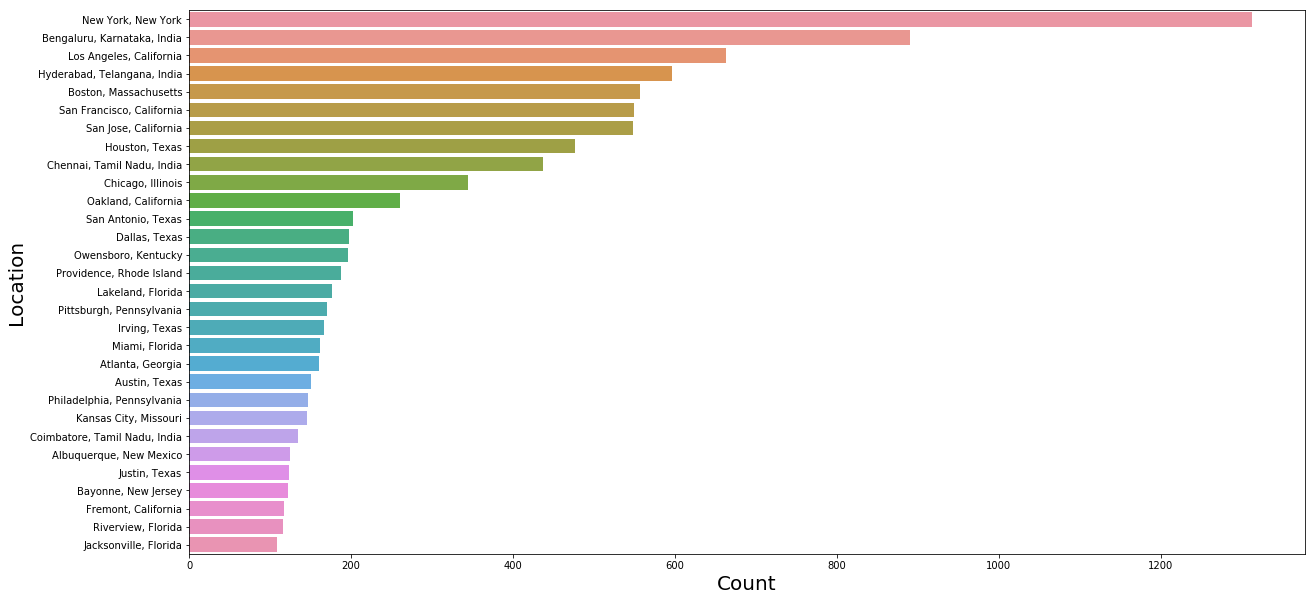

In [33]:
students_locations = students['students_location'].value_counts().head(30)
plt.figure(figsize=(20,10))
sns.barplot(students_locations.values, students_locations.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Location", fontsize=20)
plt.show()

### 2-11. Tag_questions

In [34]:
tag_questions.head()

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


In [35]:
tag_questions.describe()

,tag_questions_tag_id
count,76553.000000
mean,17289.690763
std,10308.915329
min,27.000000
25%,11165.000000
50%,18360.000000
75%,26420.000000
max,39250.000000


### 2-12. Tag_users

In [36]:
tag_users.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [37]:
tag_users.describe()

,tag_users_tag_id
count,136663.000000
mean,18971.528629
std,9018.442845
min,27.000000
25%,18065.000000
50%,18807.000000
75%,24132.000000
max,39261.000000


### 2-13. Tags

In [38]:
tags.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [39]:
tags.describe()

,tags_tag_id
count,16269.000000
mean,28511.686336
std,8421.414012
min,27.000000
25%,21711.000000
50%,31101.000000
75%,35207.000000
max,39276.000000


- Idea: Why don't you float the tags to top10 so that people can be automatically answered by clicking them on a webpage?

In [40]:
tag_n_user = pd.merge(tags, tag_users, left_on='tags_tag_id', right_on='tag_users_tag_id', how='outer')
tag_n_user.sort_values('tag_users_tag_id')[:10]

,tags_tag_id,tags_tag_name,tag_users_tag_id,tag_users_user_id
32218,27,military,27.0,5f77e0a2c3a144dda336df2294a64530
32258,27,military,27.0,d688cc76ef3a4174980754fcd059392a
32259,27,military,27.0,36ddb593ca5742f29ed9b5ac66cf24a3
32260,27,military,27.0,4d0793926fe345aa958d1796c9adf5fa
32261,27,military,27.0,8963293a4dbe49619114a7cb7d76fa51
32262,27,military,27.0,642c548196e74d579e54936c633101af
32263,27,military,27.0,838988e992724d02a9130ea1b4749466
32264,27,military,27.0,56bc0e6d30864d58be216510d0e0c259
32265,27,military,27.0,6f2cc9f24a4a474a9adf385929abb592
32266,27,military,27.0,37c5c800e3934118aac2e7b020029123


In [41]:
tag_n_user.count()

tags_tag_id          141021
tags_tag_name        141020
tag_users_tag_id     136663
tag_users_user_id    136663
dtype: int64

In [42]:
tag_n_questions = pd.merge(tags, tag_questions, left_on='tags_tag_id', right_on='tag_questions_tag_id', how='outer')
tag_n_questions.sort_values('tags_tag_id')[:10]

,tags_tag_id,tags_tag_name,tag_questions_tag_id,tag_questions_question_id
34749,27,military,27.0,27cb381eea0144b7bc9dc553a9ef41b6
34651,27,military,27.0,7378c86f1e2e42cfa58e3b977a306b06
34652,27,military,27.0,4c6d71aaf2724b9f8d439ae086d4f3da
34653,27,military,27.0,3b566e9d713b49ada0c23883c084b4e4
34654,27,military,27.0,99b90ab2a92d46dda9c332cc229ea4ba
34655,27,military,27.0,50e98c8c356b4a7b9b70c5d04cf37d7d
34656,27,military,27.0,3e9b474c11654285b3e935e8b9421402
34657,27,military,27.0,5ba467d11ff34486a5b281d873450c49
34658,27,military,27.0,e0cb5a52c3a14fba81e1ad2fefcb9299
34659,27,military,27.0,03bed809e25e4b48982ba6e31ab3dabd


In [43]:
tag_n_questions.count()

tags_tag_id                  85731
tags_tag_name                85730
tag_questions_tag_id         76553
tag_questions_question_id    76553
dtype: int64

In [44]:
tag_n_questions[['tags_tag_name','tag_questions_question_id']]

,tags_tag_name,tag_questions_question_id
0,college,bfbf79503bfb48909b4e514c5675502e
1,college,a4da117f4e3b45d49b83f7c3d6bc9915
2,college,9b90fda0660e4b72936c17a642334929
3,college,37a7d709c90445fc9643ada3933fbc6d
4,college,bc854d4070dd474797ff5f0242f510f1
5,college,b3f8dc8bb99b45c6a6898b7ea20daf6c
6,college,2fceaae061a745728d59c858670ad095
7,college,a13642cafac5475c8ba7012e13e06b28
8,college,4c521ed278a3450b995d8218aeae2da9
9,college,81fe26c0f4214d70b1c0875f3a4720a0


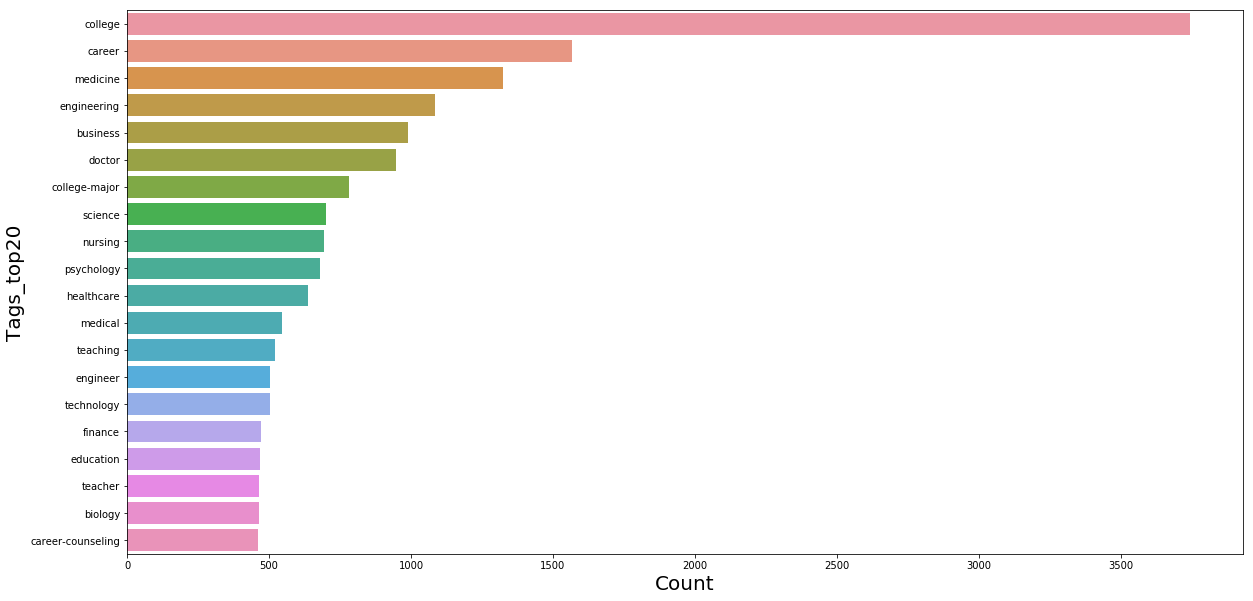

In [45]:
tags_top20 = tag_n_questions['tags_tag_name'].value_counts().head(20)
plt.figure(figsize=(20,10))
sns.barplot(tags_top20.values, tags_top20.index)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Tags_top20", fontsize=20)
plt.show()

### 3.  <a id="analyze"> Analyzing </a>

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import words

vectorizer = CountVectorizer(analyzer = 'word', 
                             lowercase = True,
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 3),
                             vocabulary = set(words.words()), # nltk의 words를 사용하거나 문서 자체의 사전을 만들거나 선택한다. 
                             max_features = 90000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=90000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None,
        vocabulary={'lophophore', 'scufter', 'featherless', 'mottledness', 'abstentious', 'selectivity', 'Telopea', 'undepressible', 'bivalvular', 'Lepisosteus', 'decrier', 'tridactyl', 'catalufa', 'educationable', 'idosaccharic', 'unsingular', 'stoichiometric', 'dumpishness', 'lunatize', 'unelectrized', 'a...fterripening', 'keraunion', 'redate', 'trigonum', 'cosmic', 'collare', 'subregular', 'medicamental'})

In [47]:
pipeline = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer(smooth_idf = False)),
])  
pipeline

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=90000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
       ...('tfidf', TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True))])

In [48]:
# See answers
%time answer_train_tfidf_vector = pipeline.fit_transform(answers['answers_body'].values.astype('U'))  

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1247: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


CPU times: user 23 s, sys: 6.02 s, total: 29 s
Wall time: 28.9 s


In [50]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

235892


['A',
 'Aani',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'Ababdeh']

In [51]:
import numpy as np
dist = np.sum(answer_train_tfidf_vector, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)

pd.DataFrame(dist, columns=vocab)

[[0. 0. 0. ... 0. 0. 0.]] A


,A,Aani,Aaron,Aaronic,Aaronical,Aaronite,Aaronitic,Aaru,Ab,Ababdeh,Ababua,Abadite,Abama,Abanic,Abantes,Abarambo,Abaris,Abasgi,Abassin,Abatua,Abba,Abbadide,Abbasside,Abbie,Abby,Abderian,Abderite,Abdiel,Abdominales,Abe,Abel,Abelia,Abelian,Abelicea,Abelite,Abelmoschus,Abelonian,Abencerrages,Aberdeen,Aberdonian,...,zymic,zymin,zymite,zymogen,zymogene,zymogenesis,zymogenic,zymogenous,zymoid,zymologic,zymological,zymologist,zymology,zymolyis,zymolysis,zymolytic,zymome,zymometer,zymomin,zymophore,zymophoric,zymophosphate,zymophyte,zymoplastic,zymoscope,zymosimeter,zymosis,zymosterol,zymosthenic,zymotechnic,zymotechnical,zymotechnics,zymotechny,zymotic,zymotically,zymotize,zymotoxic,zymurgy,zythem,zythum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.  <a id="analyze2"> Analyze </a>

1. Preprocess Professionals' data into categories. 

2. Extract only nouns from Answers' text

In [53]:
# questions.questions_id = answers.answers_question_id

Q_n_A = pd.merge(questions[['questions_id','questions_title','questions_body']], answers[['answers_question_id','answers_id','answers_body']], left_on='questions_id', right_on='answers_question_id', how='outer')
Q_n_A.sort_values('questions_id')

# inner(Except NaN) : questions_id = (51123) 23931, answers_id = 51123
# outer(Include NaN) : questions_id = (51944) 23931, answers_id = 51123

,questions_id,questions_title,questions_body,answers_question_id,answers_id,answers_body
12793,0003e7bf48f24b5c985f8fce96e611f3,Does doing double major in tech academy at Hig...,I am a Junior in H.S. right now i am thinking ...,0003e7bf48f24b5c985f8fce96e611f3,2c2e764ce4ae416fa0145ee999bb424c,"<p>Hey Sahil, great question! I think it's abs..."
12792,0003e7bf48f24b5c985f8fce96e611f3,Does doing double major in tech academy at Hig...,I am a Junior in H.S. right now i am thinking ...,0003e7bf48f24b5c985f8fce96e611f3,96a353d918584104921b82a607620711,<ol><li>Get a list of the intership companies ...
435,0006609dd4da40dcaa5a83e0499aba14,Should I declare a minor during undergrad if I...,"I'm currently an undergrad, but I want to go t...",0006609dd4da40dcaa5a83e0499aba14,f4e74694fc534db387541105197178c9,"Alex, lawyers deal with every aspect of human ..."
434,0006609dd4da40dcaa5a83e0499aba14,Should I declare a minor during undergrad if I...,"I'm currently an undergrad, but I want to go t...",0006609dd4da40dcaa5a83e0499aba14,23a89b4dc6124dabb591b2da3d6eeea3,<p>Psychology would indeed be a useful minor f...
433,0006609dd4da40dcaa5a83e0499aba14,Should I declare a minor during undergrad if I...,"I'm currently an undergrad, but I want to go t...",0006609dd4da40dcaa5a83e0499aba14,a8b9a1ef128e4798916f4b03fb66ccfa,"<p>Alex, short answer is yes, you should decla..."
46744,000af224bc2f4e94a19f8b62ba279cc4,How do I get a job in my prefered field,"So what if you have the degree, what do you do...",000af224bc2f4e94a19f8b62ba279cc4,a448a27fca8d40a08cf1722f44cf7825,"<p>Hi Tessa,</p>\n<p>A question many people en..."
50679,000b30fb534b41f7b716fa9ebf9c3f35,Is the Demand for Gym Teachers diminishing?,"Hi, I'm currently debating on whether to pursu...",000b30fb534b41f7b716fa9ebf9c3f35,987a377658c0439a8f1e74117531eb2a,"<p>Hello David,</p>\n<p>I hope you are doing g..."
50680,000b30fb534b41f7b716fa9ebf9c3f35,Is the Demand for Gym Teachers diminishing?,"Hi, I'm currently debating on whether to pursu...",000b30fb534b41f7b716fa9ebf9c3f35,9e0668ad18444fd3a30687249a0b655b,"<p>First, if becoming a gym teacher is your pa..."
3601,0018752e44b44e26bb74a0a43232b4d6,How does an aspiring mathematician stay motiva...,Hi! I am a high school senior set on becoming ...,0018752e44b44e26bb74a0a43232b4d6,6c41fd92dba046b59f750924ff54aa9c,<p>Definitely read the book and watch the movi...
248,0025b917219c4a24ba5fe260ca66ca98,what are the top colleges for forensic science?,i watch a lot of tv and my favorite show is cr...,0025b917219c4a24ba5fe260ca66ca98,f9390f8f2e4a40f9876ba0d81604734a,<html><head></head><body><p>Hi Ariana--I think...


In [54]:
Q_n_A.describe()

,questions_id,questions_title,questions_body,answers_question_id,answers_id,answers_body
count,51944,51944,51944,51123,51123,51122
unique,23931,23739,23681,23110,51123,50401
top,8eb6ba7af57846acbfec5633e537192a,What qualities should I possess if I want to b...,Interested to be a management consultant in t...,8eb6ba7af57846acbfec5633e537192a,3f0e8d3f4ca44e1c805e7cd88b429555,"<p>&lt;span style=""background-color: transpare..."
freq,58,58,58,58,1,103


3. **Making Model 1 : Answers' Keyword** <br/>
1) Mapping Answer's author_id and professinals_id <br/>
2) target columns: the categories of Professionals' (1) <br/>
3) input data: Answers' text. (2) <br/>

In [55]:
# professionals.professionals_id = answers.answers_author_id

Professionals_ID = pd.merge(professionals[['professionals_id','professionals_industry','professionals_headline']], answers[['answers_author_id','answers_id','answers_body']], left_on='professionals_id', right_on='answers_author_id', how='inner')
Professionals_ID.sort_values('professionals_id')

Professionals_ID

# inner(Except NaN) : professionals_id = (50106) 10067, answers_author_id = (50106) 10067
# outer(Include NaN) : professionals_id = (68191) 28152, answers_author_id = (51123) 10169

### No answers professionals delete SO inner join is our choice

,professionals_id,professionals_industry,professionals_headline,answers_author_id,answers_id,answers_body
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,9ced4ce7519049c0944147afb75a8ce3,7640a6e5d5224c8681cc58de860858f4,<p>Basically three things: </p>\n<ol>\n<li>Big...
1,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,f18d7fca363d4b21a81e6683c5a86b96,"<html><head></head><body><p>Hi Deja,</p>\n<p>K..."
2,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,5d670d5f8700402ab56bae609b06d02d,<html><head></head><body><p>It looks like this...
3,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,6d823a750e294c75b10fafbbbaf19855,<p><em>[Posted on behalf of a CareerVillage Pr...
4,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,63b7a06323ee4d578a37cf780debfa58,"<p>Yes, early in your career, employers certai..."
5,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,7f479cd7140e4954b838d7197b7791c3,<html><head></head><body><p>Take a look at thi...
6,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,97eba893d7084b798575e13e39f774ae,<html><head></head><body><p>Hi Timothy--this q...
7,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,026de338c3574f17ad0f5898527b5698,"<html><head></head><body><p><a href=""http://ww..."
8,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,0f5615fcffb349d9b07e9a714d0573dc,<p>[The following answer is from a 2004 Olympi...
9,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,4c4b1123c8b84be6a05c698ff3185572,<p>I'd agree. Typically if you're talking abou...


In [56]:
Professionals_ID.describe()

,professionals_id,professionals_industry,professionals_headline,answers_author_id,answers_id,answers_body
count,50106,45479,47591,50106,50106,50105
unique,10067,1200,8324,10067,50106,49388
top,36ff3b3666df400f956f8335cf53e09e,Information Technology and Services,Assist with Recognizing and Developing Potential,36ff3b3666df400f956f8335cf53e09e,50bb9d922da9405fa68e73ba09917d0d,"<p>&lt;span style=""background-color: transpare..."
freq,1710,3739,1710,1710,1,103


4. Extract keywords by combining Quests + tags & Extract only nou****ns from Questions' text.<br/>
1) Place net sentence except html code of Answers_body into a corpus <br/>
2) Run Summarization & Keywords pull with gensim.summarization package (Check parameter to see if Top 3 can be pulled)

In [57]:
Professionals_ID.answers_body[:]

0        <p>Basically three things: </p>\n<ol>\n<li>Big...
1        <html><head></head><body><p>Hi Deja,</p>\n<p>K...
2        <html><head></head><body><p>It looks like this...
3        <p><em>[Posted on behalf of a CareerVillage Pr...
4        <p>Yes, early in your career, employers certai...
5        <html><head></head><body><p>Take a look at thi...
6        <html><head></head><body><p>Hi Timothy--this q...
7        <html><head></head><body><p><a href="http://ww...
8        <p>[The following answer is from a 2004 Olympi...
9        <p>I'd agree. Typically if you're talking abou...
10       <p>It's a long road to becoming a judge, and n...
11       <p>There are many sub-fields within accounting...
12       <html><head></head><body><p>This video gives a...
13       <p>Hi Kyiana--To revise your question, first l...
14       <html><head></head><body><p>Hi Deja,</p>\n<p>C...
15       <html><head></head><body><p>Hi Destiny,<br/>\n...
16       <html><head></head><body><p>Hi Danielle--Have .

In [58]:
Answers_Text = re.sub('<.+?>', '', Professionals_ID.answers_body[0], 0, re.I|re.S)
Answers_Text = re.sub('\n','. ', Answers_Text)
Answers_Text

'Basically three things: . . Big brand name employers or schools. Academic performance (GPA). Evidence of leadership and people management skills. . 1) Big Brand Name Employers or Schools. If you\'re an Associate making $150,o00 – $200,000 USD per year, your employer is probably billing you out to clients at $600,000 USD/year.  That\'s $50,000 USD/month. The client is going to want to know what and who they are getting for that kind of money. When the answer is John or Jane Doe, who has a BS from Dartmouth, a MD from Yale and MBA from Harvard, clients respond with an "Oh wow… that\'s impressive" comment.  It makes it easier to get new clients to say "yes". Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot).. Let me explain the thought process some of these biases.  The thinking is that only super high achievers get into the top schools… and the top firms REALLY lik

In [60]:
Answers_Text = []
Answers_Text = re.sub('<.+?>', '', Professionals_ID.answers_body[0], 0, re.I|re.S)
A_list = []
A_list.append(Answers_Text)
A_list
#Answers_Text.append(re.sub('<.+?>', '', Professionals_ID.answers_body[1], 0, re.I|re.S))


['Basically three things: \n\nBig brand name employers or schools\nAcademic performance (GPA)\nEvidence of leadership and people management skills\n\n1) Big Brand Name Employers or Schools\nIf you\'re an Associate making $150,o00 – $200,000 USD per year, your employer is probably billing you out to clients at $600,000 USD/year.  That\'s $50,000 USD/month. The client is going to want to know what and who they are getting for that kind of money. When the answer is John or Jane Doe, who has a BS from Dartmouth, a MD from Yale and MBA from Harvard, clients respond with an "Oh wow… that\'s impressive" comment.  It makes it easier to get new clients to say "yes". Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot).\nLet me explain the thought process some of these biases.  The thinking is that only super high achievers get into the top schools… and the top firms REALLY li

In [61]:
Professionals_ID.answers_body[0]

'<p>Basically three things: </p>\n<ol>\n<li>Big brand name employers or schools</li>\n<li>Academic performance (GPA)</li>\n<li>Evidence of leadership and people management skills</li>\n</ol>\n<p><strong>1) Big Brand Name Employers or Schools</strong><br>\nIf you\'re an Associate making $150,o00 – $200,000 USD per year, your employer is probably billing you out to clients at $600,000 USD/year.  That\'s $50,000 USD/month. The client is going to want to know what and who they are getting for that kind of money. When the answer is John or Jane Doe, who has a BS from Dartmouth, a MD from Yale and MBA from Harvard, clients respond with an "Oh wow… that\'s impressive" comment.  It makes it easier to get new clients to say "yes". Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot).</p>\n<p>Let me explain the thought process some of these biases.  The thinking is that only s

In [62]:
str(Answers_Text)

'Basically three things: \n\nBig brand name employers or schools\nAcademic performance (GPA)\nEvidence of leadership and people management skills\n\n1) Big Brand Name Employers or Schools\nIf you\'re an Associate making $150,o00 – $200,000 USD per year, your employer is probably billing you out to clients at $600,000 USD/year.  That\'s $50,000 USD/month. The client is going to want to know what and who they are getting for that kind of money. When the answer is John or Jane Doe, who has a BS from Dartmouth, a MD from Yale and MBA from Harvard, clients respond with an "Oh wow… that\'s impressive" comment.  It makes it easier to get new clients to say "yes". Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot).\nLet me explain the thought process some of these biases.  The thinking is that only super high achievers get into the top schools… and the top firms REALLY lik

In [63]:
from gensim.summarization import summarize 
from gensim.summarization import keywords 

print("1. Summarizing :", '\n', summarize(str(Answers_Text)), '\n')
print("######################################################################################################", '\n')
print("2. Keywords :", '\n', keywords(str(Answers_Text)))

1. Summarizing : 
 Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot).
applicant ratio is high (high being defined as greater than 1%… For example, Stanford (undergrad) is a target school and my year 400 students applied for full time jobs, 6 offers were extended… and this was considered a very successful recruiting ratio by McKinsey).
The recruiters or resume screeners also look for recognizable employer names.
It is the same reason everyone wants to work for MBB – McKinsey, Bain or Boston Consulting Group — it implies something on your resume that stays with you forever.
The top firms want to know if you are smart.
If yours is different or you are applying from one country to an office in a different country, then you want to put on your resume some way for the reader to interpret your GPA (put your rank or put your %… like top 1% of class, something along those 

In [64]:
Professionals_ID["answers_keywords"] = ""

Professionals_ID.head()

,professionals_id,professionals_industry,professionals_headline,answers_author_id,answers_id,answers_body,answers_keywords
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,9ced4ce7519049c0944147afb75a8ce3,7640a6e5d5224c8681cc58de860858f4,<p>Basically three things: </p>\n<ol>\n<li>Big...,
1,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,f18d7fca363d4b21a81e6683c5a86b96,"<html><head></head><body><p>Hi Deja,</p>\n<p>K...",
2,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,5d670d5f8700402ab56bae609b06d02d,<html><head></head><body><p>It looks like this...,
3,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,6d823a750e294c75b10fafbbbaf19855,<p><em>[Posted on behalf of a CareerVillage Pr...,
4,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,0c673e046d824ec0ad0ebe012a0673e4,63b7a06323ee4d578a37cf780debfa58,"<p>Yes, early in your career, employers certai...",


In [67]:
Professionals_ID['answers_body'].fillna("No Answer", inplace = True)
for num in range(len(Professionals_ID.answers_body)):
    Answers_Text = Professionals_ID['answers_body'][num]
    Answers_Text = re.sub('<.+?>', '', Answers_Text, 0, re.I|re.S)
    Answers_Text = re.split('\n', Answers_Text)
    for n in Answers_Text:
        if (n.startswith('http')):
            del Answers_Text[Answers_Text.index(n)]
    
    result = ""
    for n in Answers_Text:
        result += n + ". "
    
    if (num%500 == 0 ):
        try:
            print("iteration : " + str(num))
            print("1. Summarizing :", '\n', summarize(str(result)), '\n')
            print("######################################################################################################", '\n')
            print("2. Keywords :", '\n', keywords(str(result)))
        except ValueError:
            pass  # do nothing!
    
    keywords1 = re.split('\n', keywords(str(result)))
    
    Professionals_ID["answers_keywords"][num] = keywords1

iteration : 0
1. Summarizing : 
 Now plenty of people get into the top firms (McKinsey included) that do NOT have such a perfect ivy pedigree… but if you got it, make sure it is OBVIOUS (it will help a lot)..
applicant ratio is high (high being defined as greater than 1%… For example, Stanford (undergrad) is a target school and my year 400 students applied for full time jobs, 6 offers were extended… and this was considered a very successful recruiting ratio by McKinsey)..
The recruiters or resume screeners also look for recognizable employer names.
It is the same reason everyone wants to work for MBB – McKinsey, Bain or Boston Consulting Group — it implies something on your resume that stays with you forever.
The top firms want to know if you are smart.
If yours is different or you are applying from one country to an office in a different country, then you want to put on your resume some way for the reader to interpret your GPA (put your rank or put your %… like top 1% of class, someth

iteration : 7500
1. Summarizing : 
 Knowing a little about Hardware, Hard Drives, Memory, and Video Cards and what each devices does also helps your career and makes you a well rounded Engineer. 

###################################################################################################### 

2. Keywords : 
 technical
good
server
like
career
help
helps
learning
microsoft
iteration : 8000
1. Summarizing : 
 . Physics requires a solid base of mathematics, and that is the core component of aerospace engineering. 

###################################################################################################### 

2. Keywords : 
 engineering
engineer
sciences
science
physics
physical
modeling
addition
iteration : 8500
1. Summarizing : 
  

###################################################################################################### 

2. Keywords : 
 career
internship
opportunity
iteration : 9000
1. Summarizing : 
 Operators may also need to have a commercial driver's l

iteration : 19500
1. Summarizing : 
 Environmental Engineering is a great choice. 

###################################################################################################### 

2. Keywords : 
 cadd
resources
field
great
hydraulics
iteration : 20000
1. Summarizing : 
 You will need to compare those acceptance rates.So, you have some “homework “ to do before you actually apply to undergrad institutions.There are things you should do while enrolled in university to increase your acceptance chances.Develop strong relationships with faculty mentors.
These skills are important because writing skills are evaluated on the MCAT and you will need to articulate well, the reason why you want to attend XYZ medical school during the applicant screening process.Maintain some type of exercise regimen or intramural sports while in college. 

###################################################################################################### 

2. Keywords : 
 medical
knowledge
advisor
scie

iteration : 32500
1. Summarizing : 
 - Many CDs are hands-on, meaning they do actual design work in additional to the leadership role.
- CDs also have the responsibility to manage the creative budget for their department and projects.
- Lastly, one of the most difficult things about the CD job is to manage lots of people doing lots of different projects. 

###################################################################################################### 

2. Keywords : 
 designers
design
designer
creative
director
directors
decision
art
media
people
different
iteration : 33000
1. Summarizing : 
  

###################################################################################################### 

2. Keywords : 
 salary
high
iteration : 33500
1. Summarizing : 
 You also have to think about the size of a college, where in the United States you would like to live, and do you want a lot of international students? 

##################################################################

iteration : 42000
1. Summarizing : 
 If you're considering other medical fields, I want to introduce you to the idea of being a PA, a physician assistant. 

###################################################################################################### 

2. Keywords : 
 nursing
nurse
nurses
career
luck
iteration : 42500
1. Summarizing : 
 I also encourage you to partake in conferences and other events held by the American Anthropological Association as it is a good way to get into the field. 

###################################################################################################### 

2. Keywords : 
 good
anthropology
anthropological
cuny
taylor
education
non
iteration : 43000
1. Summarizing : 
 Generally, interns are expected to come to work on time, with a professional attitude, and with a willingness to learn!
You learn a lot about the client and the industry you are working in  during this time as well. 

##########################################################

In [66]:
Professionals_ID[['professionals_id','answers_body','answers_keywords']].head(10)

,professionals_id,answers_body,answers_keywords
0,9ced4ce7519049c0944147afb75a8ce3,<p>Basically three things: </p>\n<ol>\n<li>Big...,"[firms, firm, recruiting, recruited, recruiter..."
1,0c673e046d824ec0ad0ebe012a0673e4,"<html><head></head><body><p>Hi Deja,</p>\n<p>K...","[anesthesia, university]"
2,0c673e046d824ec0ad0ebe012a0673e4,<html><head></head><body><p>It looks like this...,[]
3,0c673e046d824ec0ad0ebe012a0673e4,<p><em>[Posted on behalf of a CareerVillage Pr...,"[works, working, classes, owned companies, imp..."
4,0c673e046d824ec0ad0ebe012a0673e4,"<p>Yes, early in your career, employers certai...","[schools, school, university, universities, se..."
5,0c673e046d824ec0ad0ebe012a0673e4,<html><head></head><body><p>Take a look at thi...,[]
6,0c673e046d824ec0ad0ebe012a0673e4,<html><head></head><body><p>Hi Timothy--this q...,[law]
7,0c673e046d824ec0ad0ebe012a0673e4,"<html><head></head><body><p><a href=""http://ww...","[fashion, fashions, designer, design, designs,..."
8,0c673e046d824ec0ad0ebe012a0673e4,<p>[The following answer is from a 2004 Olympi...,"[runners, professional runner, training, pro t..."
9,0c673e046d824ec0ad0ebe012a0673e4,<p>I'd agree. Typically if you're talking abou...,"[degree, marketing, national consumer, like]"
